In [1]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

/anaconda/envs/transformer-gpu-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-04 11:27:34.234701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 11:27:34.447810: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 11:27:35.525604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))
tf.test.is_gpu_available()

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-11-04 11:27:52.986438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 11:27:53.625269: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /device:GPU:0 with 10787 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


True

In [3]:
import torch
print("torch.cuda.is_available() ",torch.cuda.is_available())
print("torch.cuda.current_device()",torch.cuda.current_device())

torch.cuda.is_available()  True
0


In [2]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [4]:
classifier = pipeline('sentiment-analysis',device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [7]:
classifier('This is a great movie')

[{'label': 'POSITIVE', 'score': 0.9998798370361328}]

In [8]:
classifier('This is not a great movie')

[{'label': 'NEGATIVE', 'score': 0.9997954964637756}]

In [9]:
classifier([' this is a good one',
' I dont like the content'])

[{'label': 'POSITIVE', 'score': 0.9998549222946167},
 {'label': 'NEGATIVE', 'score': 0.9955885410308838}]

In [10]:
df = pd.read_csv('AirlineTweets.csv')
df.shape

(14640, 15)

In [11]:
df = df[['text','airline_sentiment']]
df = df[df['airline_sentiment']!='neutral']
df.shape

(11541, 2)

In [11]:
target_map = {'positive':1, 'negative':0}
df['target'] = df['airline_sentiment'].map(target_map)

In [12]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,target
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1.0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0.0


In [14]:
texts = df['text'].tolist()
predictions = classifier(texts)

In [15]:
predictions[0:5]

[{'label': 'POSITIVE', 'score': 0.6070848107337952},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553210139274597}]

In [16]:
probabilities = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions]

In [17]:
probabilities[0:10]

[0.6070848107337952,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574825763702393,
 0.9553210139274597,
 0.9827086925506592,
 0.9994851350784302,
 0.9993509650230408,
 0.9940821528434753,
 0.9863133430480957]

In [18]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

In [20]:
preds = np.array(preds)


In [21]:
print("Accuracy = ", np.mean(preds==df['target']))

Accuracy =  0.8898708950697514


In [27]:
confusion_matrix(df['target'],preds)

array([[8271,  907],
       [ 364, 1999]])

In [28]:
cm = confusion_matrix(df['target'],preds, normalize='true')

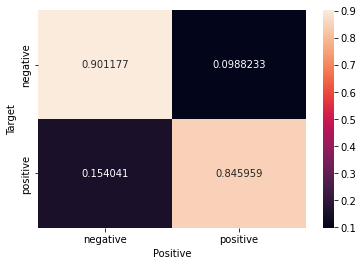

In [29]:
def plot_cm(cm):
    classes = ['negative', 'positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot= True, fmt='g')
    ax.set_xlabel('Positive')
    ax.set_ylabel('Target')
    
plot_cm(cm)

In [34]:
f1_score(df['target'], preds)

0.7587777566900741

In [35]:
f1_score(1-df['target'], 1-preds)

0.928647616908999

In [38]:
roc_auc_score(df['target'],probabilities)

0.9485935382287789

In [40]:
roc_auc_score(1-df['target'],1-np.array(probabilities))

0.9485935382287789

# AUC does not depends on the label assignment unlike F1 Score